Represent the Delta flights as a network. What are the nodes? What are the links?

In [1]:
# imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pyproj
import folium

%matplotlib inline

In [2]:
# read the data
routes = pd.read_csv('data/delta_routes.csv')
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1146 non-null   int64  
 1   airline           1146 non-null   object 
 2   airline_id        1146 non-null   float64
 3   source            1146 non-null   object 
 4   source_id         1146 non-null   float64
 5   dest              1146 non-null   object 
 6   dest_id           1146 non-null   float64
 7   codeshare         0 non-null      float64
 8   stops             1146 non-null   int64  
 9   equipment         1144 non-null   object 
 10  latitude_source   1146 non-null   float64
 11  longitude_source  1146 non-null   float64
 12  latitude_dest     1146 non-null   float64
 13  longitude_dest    1146 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usage: 125.5+ KB


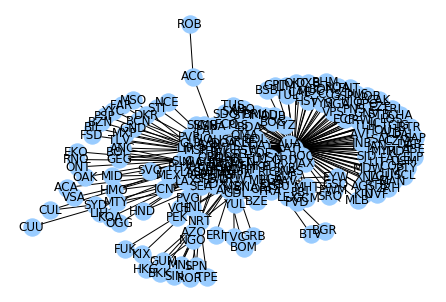

In [3]:
adjmatrix = routes[["source","dest"]]

flight_graph = nx.Graph()

# flight_graph.add_nodes_from(adjmatrix["source"].values)
# flight_graph.add_nodes_from(adjmatrix["dest"].values)

# flight_graph.nodes()
cUnique =set()

for ind in adjmatrix.index:
    flight_graph.add_edge(adjmatrix['source'][ind],adjmatrix['dest'][ind])
    cUnique.add(adjmatrix['source'][ind])
    cUnique.add(adjmatrix['dest'][ind])
#     flight_graph.add_edge(str(row['source']),str(row['dest']))

flight_graph.nodes()
BLUE = "#99CCFF"
nx.draw(flight_graph, node_color=BLUE, with_labels=True)

Which is the most important airport in Delta's network? Support your answer using appropriate network metrics. 

In [4]:
len(cUnique)

230

In [5]:
def get_top_node(lstdeg,top):    
    x_max = float(0)
    x_city = ""
    for strCity, degNode in lstdeg:
        if degNode > x_max:
            x_max = degNode
            x_city = strCity            
    return x_max, x_city

In [6]:
# degree distrib., non-normalized
print('Degree Centrality:')
dC = list(flight_graph.degree)
top_cen = get_top_node(dC,1)
print(top_cen)

Degree Centrality:
(170, 'ATL')


How many flights are needed to reach Honolulu? 

In [7]:
# Display average shortest path details
# nx.draw(flight_graph)
print('Avg shortest path from LEX to HNL is', nx.shortest_path_length(flight_graph, 'LEX','HNL'), 'hops:')
print(nx.shortest_path(flight_graph, 'LEX','HNL'))

Avg shortest path from LEX to HNL is 2 hops:
['LEX', 'ATL', 'HNL']


In [8]:
print('Avg shortest path in delta network is', nx.average_shortest_path_length(flight_graph))

Avg shortest path in delta network is 2.3404974368710842


What is the maximum number of flights needed to reach any destination in Delta's network?

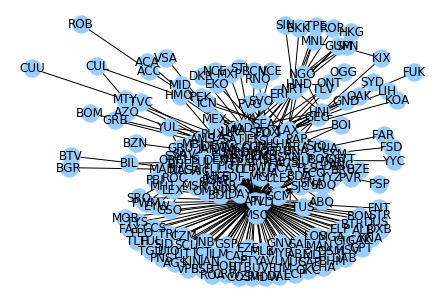

In [9]:
adjmat = routes[["source","dest"]]
flightgraph = nx.Graph()

# flight_graph.nodes()
unique_city =set()
weightage=+1
for ind in adjmat.index:
    flightgraph.add_edge(adjmat['source'][ind],adjmat['dest'][ind],weight=weightage)
    unique_city.add(adjmat['source'][ind])
    unique_city.add(adjmat['dest'][ind])
#     flight_graph.add_edge(str(row['source']),str(row['dest']))

flightgraph.nodes()
BLUE = "#99CCFF"
nx.draw(flightgraph, node_color=BLUE, with_labels=True)

In [48]:
# Display average shortest path details
# nx.draw(flightgraph)
# max_distance = nx.floyd_warshall(flightgraph,weight="weight")
max_distance = nx.all_pairs_bellman_ford_path_length(flightgraph,weight="weight")
for dist in max_distance:
    print(dist)
    print("\n")

('ABE', {'ABE': 0, 'ATL': 1, 'ABQ': 2, 'AGS': 2, 'ALB': 2, 'AMS': 2, 'AUA': 2, 'AUS': 2, 'AVL': 2, 'BDA': 2, 'BDL': 2, 'BHM': 2, 'BNA': 2, 'BOG': 2, 'BON': 2, 'BOS': 2, 'BRU': 2, 'BSB': 2, 'BTR': 2, 'BUF': 2, 'BWI': 2, 'BZE': 2, 'CAE': 2, 'CAK': 2, 'CCS': 2, 'CDG': 2, 'CHA': 2, 'CHS': 2, 'CLE': 2, 'CLT': 2, 'CMH': 2, 'COS': 2, 'CRW': 2, 'CUN': 2, 'CVG': 2, 'CZM': 2, 'DAB': 2, 'DAY': 2, 'DCA': 2, 'DEN': 2, 'DFW': 2, 'DSM': 2, 'DTW': 2, 'DUB': 2, 'DUS': 2, 'DXB': 2, 'ECP': 2, 'ELP': 2, 'EWR': 2, 'EYW': 2, 'EZE': 2, 'FAY': 2, 'FCO': 2, 'FLL': 2, 'FNT': 2, 'FPO': 2, 'FRA': 2, 'GCM': 2, 'GDL': 2, 'GIG': 2, 'GNV': 2, 'GPT': 2, 'GRR': 2, 'GRU': 2, 'GSO': 2, 'GSP': 2, 'GUA': 2, 'HNL': 2, 'HOU': 2, 'HSV': 2, 'IAD': 2, 'IAH': 2, 'ICT': 2, 'ILM': 2, 'IND': 2, 'JAN': 2, 'JAX': 2, 'JFK': 2, 'JNB': 2, 'KIN': 2, 'LAS': 2, 'LAX': 2, 'LEX': 2, 'LGA': 2, 'LHR': 2, 'LIM': 2, 'LIR': 2, 'LIT': 2, 'LOS': 2, 'MAD': 2, 'MAN': 2, 'MBJ': 2, 'MCI': 2, 'MCO': 2, 'MDT': 2, 'MDW': 2, 'MEM': 2, 'MEX': 2, 'MGA': 2, '

('EYW', {'EYW': 0, 'ATL': 1, 'LGA': 1, 'ABE': 2, 'ABQ': 2, 'AGS': 2, 'ALB': 2, 'AMS': 2, 'AUA': 2, 'AUS': 2, 'AVL': 2, 'BDA': 2, 'BDL': 2, 'BHM': 2, 'BNA': 2, 'BOG': 2, 'BON': 2, 'BOS': 2, 'BRU': 2, 'BSB': 2, 'BTR': 2, 'BUF': 2, 'BWI': 2, 'BZE': 2, 'CAE': 2, 'CAK': 2, 'CCS': 2, 'CDG': 2, 'CHA': 2, 'CHS': 2, 'CLE': 2, 'CLT': 2, 'CMH': 2, 'COS': 2, 'CRW': 2, 'CUN': 2, 'CVG': 2, 'CZM': 2, 'DAB': 2, 'DAY': 2, 'DCA': 2, 'DEN': 2, 'DFW': 2, 'DSM': 2, 'DTW': 2, 'DUB': 2, 'DUS': 2, 'DXB': 2, 'ECP': 2, 'ELP': 2, 'EWR': 2, 'EZE': 2, 'FAY': 2, 'FCO': 2, 'FLL': 2, 'FNT': 2, 'FPO': 2, 'FRA': 2, 'GCM': 2, 'GDL': 2, 'GIG': 2, 'GNV': 2, 'GPT': 2, 'GRR': 2, 'GRU': 2, 'GSO': 2, 'GSP': 2, 'GUA': 2, 'HNL': 2, 'HOU': 2, 'HSV': 2, 'IAD': 2, 'IAH': 2, 'ICT': 2, 'ILM': 2, 'IND': 2, 'JAN': 2, 'JAX': 2, 'JFK': 2, 'JNB': 2, 'KIN': 2, 'LAS': 2, 'LAX': 2, 'LEX': 2, 'LHR': 2, 'LIM': 2, 'LIR': 2, 'LIT': 2, 'LOS': 2, 'MAD': 2, 'MAN': 2, 'MBJ': 2, 'MCI': 2, 'MCO': 2, 'MDT': 2, 'MDW': 2, 'MEM': 2, 'MEX': 2, 'MGA': 2, '

('MAD', {'MAD': 0, 'ATL': 1, 'JFK': 1, 'ABE': 2, 'ABQ': 2, 'AGS': 2, 'ALB': 2, 'AMS': 2, 'AUA': 2, 'AUS': 2, 'AVL': 2, 'BDA': 2, 'BDL': 2, 'BHM': 2, 'BNA': 2, 'BOG': 2, 'BON': 2, 'BOS': 2, 'BRU': 2, 'BSB': 2, 'BTR': 2, 'BUF': 2, 'BWI': 2, 'BZE': 2, 'CAE': 2, 'CAK': 2, 'CCS': 2, 'CDG': 2, 'CHA': 2, 'CHS': 2, 'CLE': 2, 'CLT': 2, 'CMH': 2, 'COS': 2, 'CRW': 2, 'CUN': 2, 'CVG': 2, 'CZM': 2, 'DAB': 2, 'DAY': 2, 'DCA': 2, 'DEN': 2, 'DFW': 2, 'DSM': 2, 'DTW': 2, 'DUB': 2, 'DUS': 2, 'DXB': 2, 'ECP': 2, 'ELP': 2, 'EWR': 2, 'EYW': 2, 'EZE': 2, 'FAY': 2, 'FCO': 2, 'FLL': 2, 'FNT': 2, 'FPO': 2, 'FRA': 2, 'GCM': 2, 'GDL': 2, 'GIG': 2, 'GNV': 2, 'GPT': 2, 'GRR': 2, 'GRU': 2, 'GSO': 2, 'GSP': 2, 'GUA': 2, 'HNL': 2, 'HOU': 2, 'HSV': 2, 'IAD': 2, 'IAH': 2, 'ICT': 2, 'ILM': 2, 'IND': 2, 'JAN': 2, 'JAX': 2, 'JNB': 2, 'KIN': 2, 'LAS': 2, 'LAX': 2, 'LEX': 2, 'LGA': 2, 'LHR': 2, 'LIM': 2, 'LIR': 2, 'LIT': 2, 'LOS': 2, 'MAN': 2, 'MBJ': 2, 'MCI': 2, 'MCO': 2, 'MDT': 2, 'MDW': 2, 'MEM': 2, 'MEX': 2, 'MGA': 2, '

('TPA', {'TPA': 0, 'ATL': 1, 'CVG': 1, 'DTW': 1, 'JFK': 1, 'LAX': 1, 'LGA': 1, 'MSP': 1, 'ABE': 2, 'ABQ': 2, 'AGS': 2, 'ALB': 2, 'AMS': 2, 'AUA': 2, 'AUS': 2, 'AVL': 2, 'BDA': 2, 'BDL': 2, 'BHM': 2, 'BNA': 2, 'BOG': 2, 'BON': 2, 'BOS': 2, 'BRU': 2, 'BSB': 2, 'BTR': 2, 'BUF': 2, 'BWI': 2, 'BZE': 2, 'CAE': 2, 'CAK': 2, 'CCS': 2, 'CDG': 2, 'CHA': 2, 'CHS': 2, 'CLE': 2, 'CLT': 2, 'CMH': 2, 'COS': 2, 'CRW': 2, 'CUN': 2, 'CZM': 2, 'DAB': 2, 'DAY': 2, 'DCA': 2, 'DEN': 2, 'DFW': 2, 'DSM': 2, 'DUB': 2, 'DUS': 2, 'DXB': 2, 'ECP': 2, 'ELP': 2, 'EWR': 2, 'EYW': 2, 'EZE': 2, 'FAY': 2, 'FCO': 2, 'FLL': 2, 'FNT': 2, 'FPO': 2, 'FRA': 2, 'GCM': 2, 'GDL': 2, 'GIG': 2, 'GNV': 2, 'GPT': 2, 'GRR': 2, 'GRU': 2, 'GSO': 2, 'GSP': 2, 'GUA': 2, 'HNL': 2, 'HOU': 2, 'HSV': 2, 'IAD': 2, 'IAH': 2, 'ICT': 2, 'ILM': 2, 'IND': 2, 'JAN': 2, 'JAX': 2, 'JNB': 2, 'KIN': 2, 'LAS': 2, 'LEX': 2, 'LHR': 2, 'LIM': 2, 'LIR': 2, 'LIT': 2, 'LOS': 2, 'MAD': 2, 'MAN': 2, 'MBJ': 2, 'MCI': 2, 'MCO': 2, 'MDT': 2, 'MDW': 2, 'MEM': 2, '

('MSO', {'MSO': 0, 'MSP': 1, 'ABQ': 2, 'AMS': 2, 'ANC': 2, 'ATL': 2, 'AUS': 2, 'BDL': 2, 'BIL': 2, 'BOI': 2, 'BOS': 2, 'BWI': 2, 'BZN': 2, 'CDG': 2, 'CLE': 2, 'CLT': 2, 'CUN': 2, 'DAY': 2, 'DCA': 2, 'DEN': 2, 'DFW': 2, 'DTW': 2, 'EWR': 2, 'FAR': 2, 'FLL': 2, 'FSD': 2, 'GEG': 2, 'GRR': 2, 'IND': 2, 'JFK': 2, 'LAS': 2, 'LAX': 2, 'LGA': 2, 'LHR': 2, 'MCI': 2, 'MCO': 2, 'MEM': 2, 'MIA': 2, 'MKE': 2, 'MSN': 2, 'CMH': 2, 'IAH': 2, 'NRT': 2, 'OMA': 2, 'ORD': 2, 'PDX': 2, 'PHL': 2, 'PHX': 2, 'PIT': 2, 'PSP': 2, 'RDU': 2, 'RSW': 2, 'SAN': 2, 'SDF': 2, 'SEA': 2, 'SFO': 2, 'SJC': 2, 'SLC': 2, 'SMF': 2, 'SNA': 2, 'STL': 2, 'TPA': 2, 'TUS': 2, 'YYC': 2, 'BOM': 3, 'ABE': 3, 'AGS': 3, 'ALB': 3, 'AUA': 3, 'AVL': 3, 'BDA': 3, 'BHM': 3, 'BNA': 3, 'BOG': 3, 'BON': 3, 'BRU': 3, 'BSB': 3, 'BTR': 3, 'BUF': 3, 'BZE': 3, 'CAE': 3, 'CAK': 3, 'CCS': 3, 'CHA': 3, 'CHS': 3, 'COS': 3, 'CRW': 3, 'CVG': 3, 'CZM': 3, 'DAB': 3, 'DSM': 3, 'DUB': 3, 'DUS': 3, 'DXB': 3, 'ECP': 3, 'ELP': 3, 'EYW': 3, 'EZE': 3, 'FAY': 3, '

In [54]:
def flatten(x):
    if isinstance(x, collections.Iterable):
        return [a for i in x for a in flatten(i)]
    else:
        return [x]

In [55]:
max_distance = dict(nx.all_pairs_bellman_ford_path_length(flightgraph,weight="weight"))
max_distance["ROB"]["CUU"]

5

In [56]:
x = flatten(max_distance)

RecursionError: maximum recursion depth exceeded in comparison

In [52]:
def print_dict(dictionary):
    dictionary_array = [dictionary]
    for sub_dictionary in dictionary_array:
        if type(sub_dictionary) is dict:
            for key, value in sub_dictionary.items():
                print("key=", key)
                print("value", value)
                if type(value) is dict:
                    dictionary_array.append(value)

In [53]:
print_dict(max_distance)

key= ABE
value {'ABE': 0, 'ATL': 1, 'ABQ': 2, 'AGS': 2, 'ALB': 2, 'AMS': 2, 'AUA': 2, 'AUS': 2, 'AVL': 2, 'BDA': 2, 'BDL': 2, 'BHM': 2, 'BNA': 2, 'BOG': 2, 'BON': 2, 'BOS': 2, 'BRU': 2, 'BSB': 2, 'BTR': 2, 'BUF': 2, 'BWI': 2, 'BZE': 2, 'CAE': 2, 'CAK': 2, 'CCS': 2, 'CDG': 2, 'CHA': 2, 'CHS': 2, 'CLE': 2, 'CLT': 2, 'CMH': 2, 'COS': 2, 'CRW': 2, 'CUN': 2, 'CVG': 2, 'CZM': 2, 'DAB': 2, 'DAY': 2, 'DCA': 2, 'DEN': 2, 'DFW': 2, 'DSM': 2, 'DTW': 2, 'DUB': 2, 'DUS': 2, 'DXB': 2, 'ECP': 2, 'ELP': 2, 'EWR': 2, 'EYW': 2, 'EZE': 2, 'FAY': 2, 'FCO': 2, 'FLL': 2, 'FNT': 2, 'FPO': 2, 'FRA': 2, 'GCM': 2, 'GDL': 2, 'GIG': 2, 'GNV': 2, 'GPT': 2, 'GRR': 2, 'GRU': 2, 'GSO': 2, 'GSP': 2, 'GUA': 2, 'HNL': 2, 'HOU': 2, 'HSV': 2, 'IAD': 2, 'IAH': 2, 'ICT': 2, 'ILM': 2, 'IND': 2, 'JAN': 2, 'JAX': 2, 'JFK': 2, 'JNB': 2, 'KIN': 2, 'LAS': 2, 'LAX': 2, 'LEX': 2, 'LGA': 2, 'LHR': 2, 'LIM': 2, 'LIR': 2, 'LIT': 2, 'LOS': 2, 'MAD': 2, 'MAN': 2, 'MBJ': 2, 'MCI': 2, 'MCO': 2, 'MDT': 2, 'MDW': 2, 'MEM': 2, 'MEX': 2, 'MGA

value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= BOM
value 3
key= AZO
value 3
key= ERI
value 3
key= GRB
value 3
key= ICN
value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= PVG
value 3
key= TVC
value 3
key= YUL
value 3
key= FUK
value 3
key= KIX
value 3
key= SVO
value 3
key= ACC
value 3
key= BCN
value 3
key= DKR
value 3
key= GND
value 3
key= MXP
value 3
key= NCE
value 3
key= S

key= IAD
value 2
key= IND
value 2
key= JAX
value 2
key= LAS
value 2
key= LAX
value 2
key= LHR
value 2
key= LIR
value 2
key= MAD
value 2
key= MBJ
value 2
key= MCO
value 2
key= MEX
value 2
key= MIA
value 2
key= MSP
value 2
key= MXP
value 2
key= NAS
value 2
key= NCE
value 2
key= NRT
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PUJ
value 2
key= PVG
value 2
key= RDU
value 2
key= RIC
value 2
key= ROC
value 2
key= SAN
value 2
key= SAT
value 2
key= SAV
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= STI
value 2
key= STL
value 2
key= STT
value 2
key= SVO
value 2
key= SXM
value 2
key= SYR
value 2
key= TLV
value 2
key= TPA
value 2
key= VCE
value 2
key= YUL
value 2
key= YYZ
value 2
key= BOM
value 3
key= EWR
value 3
key= ABE
value 3
key= ABQ
value 3
key= AGS
value 3
key= ALB
value 3
key= AVL
value 3
key= BDL
value

key= MXP
value 3
key= NCE
value 3
key= STI
value 3
key= TLV
value 3
key= VCE
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= ALB
value 0
key= ATL
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value

value 1
key= LHR
value 1
key= MCO
value 1
key= MSP
value 1
key= PLS
value 1
key= RDU
value 1
key= SLC
value 1
key= BOM
value 2
key= EWR
value 2
key= PDX
value 2
key= SEA
value 2
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= COS
value 2
key= CRW
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= G

key= PEK
value 2
key= PVG
value 2
key= TVC
value 2
key= YUL
value 2
key= ACC
value 2
key= BCN
value 2
key= DKR
value 2
key= GND
value 2
key= MXP
value 2
key= NCE
value 2
key= STI
value 2
key= SVO
value 2
key= TLV
value 2
key= VCE
value 2
key= ANC
value 2
key= BIL
value 2
key= BOI
value 2
key= BZN
value 2
key= FAR
value 2
key= FSD
value 2
key= GEG
value 2
key= MSO
value 2
key= PSP
value 2
key= YYC
value 2
key= BKK
value 2
key= GUM
value 2
key= HKG
value 2
key= MNL
value 2
key= ROR
value 2
key= SIN
value 2
key= SPN
value 2
key= TPE
value 2
key= EKO
value 2
key= OAK
value 2
key= ONT
value 2
key= RNO
value 2
key= HND
value 3
key= FUK
value 3
key= KIX
value 3
key= HMO
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= CUL
value 3
key= CUU
value 3
key= ROB
value 3
key= SEA
value 0
key= AMS
value 1
key= ATL
value 1
key= CDG
value 1
key= DTW
value 1
key= HND
value 1
key= HNL
value

value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= ACC
value 2
key= BCN
value 2
key= DKR
value 2
key= GND
value 2
key= ICN
value 2
key= MXP
value 2
key= NCE
value 2
key= PVG
value 2
key= S

value 1
key= MSP
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= G

value 2
key= JAX
value 2
key= JNB
value 2
key= KIN
value 2
key= LAS
value 2
key= LAX
value 2
key= LEX
value 2
key= LGA
value 2
key= LHR
value 2
key= LIM
value 2
key= LIR
value 2
key= LIT
value 2
key= LOS
value 2
key= MAD
value 2
key= MAN
value 2
key= MBJ
value 2
key= MCI
value 2
key= MCO
value 2
key= MDT
value 2
key= MDW
value 2
key= MEM
value 2
key= MEX
value 2
key= MGA
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSP
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= S

value 3
key= STI
value 3
key= TLV
value 3
key= VCE
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= BTR
value 0
key= ATL
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= B

key= MCO
value 2
key= MDT
value 2
key= MDW
value 2
key= MEM
value 2
key= MEX
value 2
key= MGA
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSP
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value

value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value 2
key= HSV
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JNB
value 2
key= KIN
value 2
key= LAS
value 2
key= LEX
value 2
key= LGA
value 2
key= LHR
value 2
key= LIM
value 2
key= LIR
value 2
key= LIT
value 2
key= LOS
value 2
key= MAD
value 2
key= MAN
value 2
key= MBJ
value 2
key= MCI
value 2
key= MCO
value 2
key= MDT
value 2
key= M

key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= AZO
value 2
key= ERI
value 2
key= GRB
value 2
key= ICN
value 2
key= MTY
value 2
key= NGO
value 2
key= PEK
value 2
key= PVG
value 2
key= TVC
value 2
key= YUL
value 2
key= ACC
value 2
key= BCN
value 2
key= DKR
value 2
key= GND
value 2
key= MXP
value 2
key= NCE
value 2
key= STI
value 2
key= SVO
value 2
key= TLV
value 2
key= VCE
value 2
key= ANC
value 2
key= BIL
value 2
key= BOI
value 2
key= BZN
value 2
key= FAR
value 2
key= FSD
value 2
key= GEG
value 2
key= MSO
value 2
key= PSP
value 2
key= YYC
value 2
key= BOM
value 3
key= FUK
value 3
key= KIX
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value

value 3
key= FUK
value 3
key= KIX
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value 3
key= CUU
value 3
key= ROB
value 3
key= COS
value 0
key= ATL
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= D

key= MAD
value 2
key= MAN
value 2
key= MBJ
value 2
key= MDT
value 2
key= MDW
value 2
key= MEM
value 2
key= MEX
value 2
key= MGA
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSP
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHX
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= ROA
value 2
key= ROC
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TRI
value

value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value 2
key= HSV
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JNB
value 2
key= KIN
value 2
key= LAS
value 2
key= LAX
value 2
key= LEX
value 2
key= LGA
value 2
key= LHR
value 2
key= LIM
value 2
key= LIR
value 2
key= LIT
value 2
key= LOS
value 2
key= MAD
value 2
key= MAN
value 2
key= MBJ
value 2
key= MCI
value 2
key= MCO
value 2
key= MDT
value 2
key= MDW
value 2
key= MEM
value 2
key= MEX
value 2
key= MGA
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= O

value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= BOM
value 3
key= AZO
value 3
key= ERI
value 3
key= GRB
value 3
key= I

value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= U

key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DTW
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value

value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value 2
key= HSV
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JNB
value 2
key= KIN
value 2
key= LAS
value 2
key= LAX
value 2
key= LEX
value 2
key= LHR
value 2
key= LIM
value 2
key= LIR
value 2
key= LIT
value 2
key= LOS
value 2
key= MAD
value 2
key= MAN
value 2
key= M

key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= AZO
value 2
key= ERI
value 2
key= GRB
value 2
key= ICN
value 2
key= MTY
value 2
key= NGO
value 2
key= PEK
value 2
key= PVG
value 2
key= TVC
value 2
key= YUL
value 2
key= ACC
value 2
key= BCN
value 2
key= DKR
value 2
key= GND
value 2
key= MXP
value 2
key= NCE
value 2
key= STI
value 2
key= SVO
value 2
key= TLV
value 2
key= VCE
value 2
key= BOM
value 3
key= FUK
value 3
key= KIX
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value

key= GRB
value 3
key= ICN
value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= PVG
value 3
key= TVC
value 3
key= YUL
value 3
key= FUK
value 3
key= KIX
value 3
key= SVO
value 3
key= ACC
value 3
key= BCN
value 3
key= DKR
value 3
key= GND
value 3
key= MXP
value 3
key= NCE
value 3
key= STI
value 3
key= TLV
value 3
key= VCE
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= GNV
value 0
key= ATL
value 1
key= ABE
value

key= ONT
value 3
key= RNO
value 3
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= GRR
value 0
key= ATL
value 1
key= CVG
value 1
key= DTW
value 1
key= MSP
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value

key= TVC
value 3
key= YUL
value 3
key= FUK
value 3
key= KIX
value 3
key= SVO
value 3
key= ACC
value 3
key= BCN
value 3
key= DKR
value 3
key= GND
value 3
key= MXP
value 3
key= NCE
value 3
key= STI
value 3
key= TLV
value 3
key= VCE
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= GUA
value 0
key= ATL
value 1
key= JFK
value 1
key= LAX
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value

key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DTW
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JFK
value 2
key= JNB
value 2
key= KIN
value 2
key= LAS
value 2
key= LAX
value 2
key= LEX
value 2
key= LGA
value 2
key= LHR
value 2
key= LIM
value 2
key= LIR
value 2
key= LIT
value 2
key= LOS
value

value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= ILM
value 0
key= ATL
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= C

key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= BGR
value 2
key= BTV
value 2
key= YUL
value 2
key= ACC
value 2
key= BCN
value 2
key= DKR
value 2
key= GND
value 2
key= ICN
value 2
key= MXP
value 2
key= NCE
value 2
key= PVG
value 2
key= STI
value 2
key= SVO
value 2
key= TLV
value 2
key= VCE
value 2
key= BOM
value 3
key= AZO
value 3
key= ERI
value 3
key= GRB
value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= TVC
value 3
key= FUK
value 3
key= KIX
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value

value 2
key= BOG
value 2
key= BON
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= COS
value 2
key= CRW
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= HOU
value 2
key= HSV
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= JAN
value 2
key= JAX
value 2
key= JNB
value 2
key= KIN
value 2
key= LEX
value 2
key= LGA
value 2
key= LHR
value 2
key= L

key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DTW
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value

key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSP
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value

key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value

key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value 2
key= HSV
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JFK
value 2
key= JNB
value 2
key= KIN
value

value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= BGR
value 2
key= BTV
value 2
key= YUL
value 2
key= AZO
value 2
key= ERI
value 2
key= GRB
value 2
key= ICN
value 2
key= MTY
value 2
key= NGO
value 2
key= PEK
value 2
key= PVG
value 2
key= TVC
value 2
key= BOM
value 3
key= FUK
value 3
key= KIX
value 3
key= S

value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DTW
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value 2
key= HSV
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JFK
value 2
key= JNB
value 2
key= KIN
value 2
key= L

value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= BOM
value 3
key= AZO
value 3
key= ERI
value 3
key= GRB
value 3
key= ICN
value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= PVG
value 3
key= TVC
value 3
key= YUL
value 3
key= FUK
value 3
key= KIX
value 3
key= SVO
value 3
key= ACC
value 3
key= BCN
value 3
key= DKR
value 3
key= GND
value 3
key= MXP
value 3
key= NCE
value 3
key= STI
value 3
key= TLV
value 3
key= VCE
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= M

key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= AZO
value 2
key= ERI
value 2
key= GRB
value 2
key= ICN
value 2
key= MTY
value 2
key= NGO
value 2
key= PEK
value 2
key= TVC
value 2
key= YUL
value 2
key= KIX
value 2
key= FUK
value 2
key= ACC
value 2
key= BCN
value 2
key= DKR
value 2
key= GND
value 2
key= MXP
value 2
key= NCE
value 2
key= STI
value 2
key= SVO
value 2
key= TLV
value 2
key= VCE
value 2
key= HMO
value 2
key= HND
value 2
key= KOA
value 2
key= LIH
value 2
key= OGG
value 2
key= SYD
value 2
key= ANC
value 2
key= BIL
value 2
key= BOI
value 2
key= BZN
value 2
key= FAR
value 2
key= FSD
value 2
key= GEG
value 2
key= MSO
value 2
key= PSP
value 2
key= YYC
value 2
key= BOM
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value

key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value 2
key= HSV
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JNB
value 2
key= KIN
value 2
key= LAS
value

key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= AZO
value 2
key= ERI
value 2
key= GRB
value 2
key= ICN
value 2
key= MTY
value 2
key= NGO
value 2
key= PEK
value 2
key= PVG
value 2
key= TVC
value 2
key= YUL
value 2
key= ACC
value 2
key= BCN
value 2
key= DKR
value 2
key= GND
value 2
key= MXP
value 2
key= NCE
value 2
key= STI
value 2
key= SVO
value 2
key= TLV
value 2
key= VCE
value 2
key= ANC
value 2
key= BIL
value 2
key= BOI
value 2
key= BZN
value 2
key= FAR
value 2
key= FSD
value 2
key= GEG
value 2
key= MSO
value 2
key= PSP
value 2
key= YYC
value 2
key= EKO
value 2
key= OAK
value 2
key= ONT
value 2
key= RNO
value 2
key= BOM
value 3
key= FUK
value 3
key= KIX
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= BKK
value 3
key= GUM
value

key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DTW
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value

key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value 2
key= HSV
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JFK
value 2
key= JNB
value 2
key= KIN
value 2
key= LAS
value 2
key= LAX
value 2
key= LEX
value 2
key= LGA
value 2
key= LHR
value 2
key= LIM
value 2
key= LIR
value 2
key= LIT
value 2
key= LOS
value 2
key= MAD
value 2
key= MAN
value 2
key= MBJ
value 2
key= MCI
value 2
key= MCO
value 2
key= MDT
value 2
key= MDW
value 2
key= MEM
value 2
key= MEX
value 2
key= MGA
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSP
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value

key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value 2
key= FNT
value 2
key= FPO
value 2
key= FRA
value 2
key= GCM
value 2
key= GDL
value 2
key= GIG
value 2
key= GNV
value 2
key= GPT
value 2
key= GRR
value 2
key= GRU
value 2
key= GSO
value 2
key= GSP
value 2
key= GUA
value 2
key= HNL
value 2
key= HOU
value 2
key= HSV
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JNB
value 2
key= KIN
value 2
key= LEX
value 2
key= LHR
value 2
key= LIM
value 2
key= LIR
value 2
key= LIT
value 2
key= LOS
value

value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= ROC
value 0
key= ATL
value 1
key= JFK
value 1
key= LGA
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= D

value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSP
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= T

value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= CUL
value 3
key= CUU
value 3
key= ROB
value 3
key= SAP
value 0
key= ATL
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DTW
value 2
key= D

value 2
key= MSP
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= U

value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= ACC
value 2
key= BCN
value 2
key= DKR
value 2
key= GND
value 2
key= ICN
value 2
key= MXP
value 2
key= NCE
value 2
key= PVG
value 2
key= STI
value 2
key= SVO
value 2
key= TLV
value 2
key= VCE
value 2
key= YUL
value 2
key= BOM
value 3
key= AZO
value 3
key= ERI
value 3
key= GRB
value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= TVC
value 3
key= FUK
value 3
key= K

key= LEX
value 2
key= LGA
value 2
key= LHR
value 2
key= LIM
value 2
key= LIR
value 2
key= LIT
value 2
key= LOS
value 2
key= MAD
value 2
key= MAN
value 2
key= MBJ
value 2
key= MCI
value 2
key= MCO
value 2
key= MDT
value 2
key= MDW
value 2
key= MEM
value 2
key= MEX
value 2
key= MGA
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSP
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value

value 2
key= HSV
value 2
key= IAD
value 2
key= IAH
value 2
key= ICT
value 2
key= ILM
value 2
key= IND
value 2
key= JAN
value 2
key= JAX
value 2
key= JFK
value 2
key= JNB
value 2
key= KIN
value 2
key= LAS
value 2
key= LAX
value 2
key= LEX
value 2
key= LGA
value 2
key= LHR
value 2
key= LIM
value 2
key= LIR
value 2
key= LIT
value 2
key= LOS
value 2
key= MAD
value 2
key= MAN
value 2
key= MBJ
value 2
key= MCI
value 2
key= MCO
value 2
key= MDT
value 2
key= MDW
value 2
key= MEM
value 2
key= MEX
value 2
key= MGA
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= R

key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TPA
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= BGR
value 2
key= BTV
value 2
key= YUL
value 2
key= BOM
value 3
key= AZO
value 3
key= ERI
value 3
key= GRB
value 3
key= ICN
value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= PVG
value 3
key= TVC
value

value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= STT
value 0
key= ATL
value 1
key= JFK
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= C

value 2
key= MAD
value 2
key= MAN
value 2
key= MBJ
value 2
key= MCI
value 2
key= MCO
value 2
key= MDT
value 2
key= MDW
value 2
key= MEM
value 2
key= MEX
value 2
key= MGA
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSP
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= S

value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value 2
key= SXM
value 2
key= SYR
value 2
key= TGU
value 2
key= TLH
value 2
key= TRI
value 2
key= TUL
value 2
key= TUS
value 2
key= TYS
value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= XNA
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= AZO
value 2
key= ERI
value 2
key= GRB
value 2
key= ICN
value 2
key= MTY
value 2
key= NGO
value 2
key= PEK
value 2
key= PVG
value 2
key= TVC
value 2
key= YUL
value 2
key= ACC
value 2
key= BCN
value 2
key= DKR
value 2
key= GND
value 2
key= MXP
value 2
key= NCE
value 2
key= STI
value 2
key= SVO
value 2
key= TLV
value 2
key= VCE
value 2
key= HMO
value 2
key= HND
value 2
key= KOA
value 2
key= LIH
value 2
key= OGG
value 2
key= SYD
value 2
key= BGR
value 2
key= BTV
value 2
key= ANC
value 2
key= BIL
value 2
key= BOI
value 2
key= BZN
value 2
key= FAR
value 2
key= FSD
value 2
key= GEG
value 2
key= M

key= MDW
value 2
key= MEM
value 2
key= MEX
value 2
key= MGA
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MLB
value 2
key= MOB
value 2
key= MSN
value 2
key= MSY
value 2
key= MUC
value 2
key= MYR
value 2
key= NAS
value 2
key= NRT
value 2
key= OKC
value 2
key= OMA
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PBI
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PNS
value 2
key= PTY
value 2
key= PUJ
value 2
key= PVD
value 2
key= PVR
value 2
key= PWM
value 2
key= RDU
value 2
key= RIC
value 2
key= ROA
value 2
key= ROC
value 2
key= RSW
value 2
key= RTB
value 2
key= SAL
value 2
key= SAN
value 2
key= SAP
value 2
key= SAT
value 2
key= SAV
value 2
key= SCL
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJC
value 2
key= SJD
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= SMF
value 2
key= SNA
value 2
key= SRQ
value 2
key= STL
value 2
key= STR
value 2
key= STT
value

key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= UVF
value 0
key= ATL
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DTW
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value

value 2
key= UIO
value 2
key= UVF
value 2
key= VPS
value 2
key= ZRH
value 2
key= DAL
value 2
key= YYZ
value 2
key= BOM
value 3
key= AZO
value 3
key= ERI
value 3
key= GRB
value 3
key= ICN
value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= PVG
value 3
key= TVC
value 3
key= YUL
value 3
key= FUK
value 3
key= KIX
value 3
key= SVO
value 3
key= ACC
value 3
key= BCN
value 3
key= DKR
value 3
key= GND
value 3
key= MXP
value 3
key= NCE
value 3
key= STI
value 3
key= TLV
value 3
key= VCE
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= E

value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= FUK
value 4
key= KIX
value 4
key= BGR
value 4
key= BTV
value 4
key= CUL
value 4
key= CUU
value 4
key= BGR
value 0
key= LGA
value 1
key= ATL
value 2
key= AUA
value 2
key= BTV
value 2
key= BUF
value 2
key= CHS
value 2
key= CLT
value 2
key= CMH
value 2
key= CVG
value 2
key= DEN
value 2
key= DFW
value 2
key= DTW
value 2
key= EYW
value 2
key= FLL
value 2
key= IND
value 2
key= JAX
value 2
key= LEX
value 2
key= GSO
value 2
key= MCO
value 2
key= MHT
value 2
key= MIA
value 2
key= MKE
value 2
key= MSN
value 2
key= MSP
value 2
key= MSY
value 2
key= PBI
value 2
key= P

key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BOM
value 4
key= BGR
value 4
key= BTV
value 4
key= ACA
value 4
key= MID
value 4
key= VSA
value 4
key= EKO
value 4
key= OAK
value 4
key= ONT
value 4
key= RNO
value 4
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= BOI
value 0
key= MSP
value 1
key= SLC
value 1
key= ABQ
value 2
key= AMS
value 2
key= ANC
value 2
key= ATL
value 2
key= AUS
value 2
key= BDL
value 2
key= BIL
value 2
key= BOS
value 2
key= BWI
value 2
key= BZN
value 2
key= CDG
value 2
key= CLE
value 2
key= CLT
value 2
key= CUN
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DTW
value 2
key= EWR
value 2
key= FAR
value 2
key= FLL
value 2
key= FSD
value 2
key= GEG
value 2
key= GRR
value 2
key= IND
value 2
key= JFK
value 2
key= LAS
value 2
key= LAX
value 2
key= LGA
value 2
key= LHR
value 2
key= MCI
value 2
key= MCO
value 2
key= MEM
value 2
key= MIA
value 2
key= MKE
value

key= ROB
value 4
key= CUL
value 0
key= HMO
value 1
key= MTY
value 1
key= LAX
value 2
key= MEX
value 2
key= PHX
value 2
key= DTW
value 2
key= CUU
value 2
key= LAS
value 2
key= ATL
value 3
key= BNA
value 3
key= BOS
value 3
key= BZE
value 3
key= CDG
value 3
key= CMH
value 3
key= CUN
value 3
key= CVG
value 3
key= GDL
value 3
key= GUA
value 3
key= HND
value 3
key= HNL
value 3
key= IND
value 3
key= JFK
value 3
key= KOA
value 3
key= LIH
value 3
key= LIR
value 3
key= MCO
value 3
key= MEM
value 3
key= MIA
value 3
key= MSP
value 3
key= MSY
value 3
key= NRT
value 3
key= OGG
value 3
key= PVR
value 3
key= RDU
value 3
key= SEA
value 3
key= SJO
value 3
key= SLC
value 3
key= SVO
value 3
key= SYD
value 3
key= TPA
value 3
key= DFW
value 3
key= IAD
value 3
key= IAH
value 3
key= ACA
value 3
key= MID
value 3
key= ORD
value 3
key= SAT
value 3
key= SFO
value 3
key= VSA
value 3
key= AMS
value 3
key= AUS
value 3
key= AZO
value 3
key= BDL
value 3
key= BUF
value 3
key= BWI
value 3
key= CHS
value 3
key= CLE
value

key= RNO
value 3
key= FUK
value 4
key= KIX
value 4
key= ROB
value 4
key= DAL
value 0
key= ATL
value 1
key= ABE
value 2
key= ABQ
value 2
key= AGS
value 2
key= ALB
value 2
key= AMS
value 2
key= AUA
value 2
key= AUS
value 2
key= AVL
value 2
key= BDA
value 2
key= BDL
value 2
key= BHM
value 2
key= BNA
value 2
key= BOG
value 2
key= BON
value 2
key= BOS
value 2
key= BRU
value 2
key= BSB
value 2
key= BTR
value 2
key= BUF
value 2
key= BWI
value 2
key= BZE
value 2
key= CAE
value 2
key= CAK
value 2
key= CCS
value 2
key= CDG
value 2
key= CHA
value 2
key= CHS
value 2
key= CLE
value 2
key= CLT
value 2
key= CMH
value 2
key= COS
value 2
key= CRW
value 2
key= CUN
value 2
key= CVG
value 2
key= CZM
value 2
key= DAB
value 2
key= DAY
value 2
key= DCA
value 2
key= DEN
value 2
key= DFW
value 2
key= DSM
value 2
key= DTW
value 2
key= DUB
value 2
key= DUS
value 2
key= DXB
value 2
key= ECP
value 2
key= ELP
value 2
key= EWR
value 2
key= EYW
value 2
key= EZE
value 2
key= FAY
value 2
key= FCO
value 2
key= FLL
value

value 2
key= PUJ
value 2
key= PVD
value 2
key= PVG
value 2
key= RDU
value 2
key= RIC
value 2
key= RSW
value 2
key= SAN
value 2
key= SAT
value 2
key= SDF
value 2
key= SEA
value 2
key= SFO
value 2
key= SJU
value 2
key= SLC
value 2
key= STL
value 2
key= SYR
value 2
key= TPA
value 2
key= TVC
value 2
key= MHT
value 2
key= SAV
value 2
key= YUL
value 2
key= BOM
value 3
key= ABE
value 3
key= ABQ
value 3
key= AGS
value 3
key= ALB
value 3
key= AUA
value 3
key= AVL
value 3
key= BDA
value 3
key= BHM
value 3
key= BOG
value 3
key= BON
value 3
key= BRU
value 3
key= BSB
value 3
key= BTR
value 3
key= BZE
value 3
key= CAE
value 3
key= CAK
value 3
key= CCS
value 3
key= CHA
value 3
key= COS
value 3
key= CRW
value 3
key= CZM
value 3
key= DAB
value 3
key= DSM
value 3
key= DUB
value 3
key= DUS
value 3
key= DXB
value 3
key= ECP
value 3
key= ELP
value 3
key= EYW
value 3
key= EZE
value 3
key= FAY
value 3
key= FCO
value 3
key= FNT
value 3
key= FPO
value 3
key= GDL
value 3
key= GIG
value 3
key= GNV
value 3
key= G

value 3
key= BON
value 3
key= BRU
value 3
key= BSB
value 3
key= BTR
value 3
key= BZE
value 3
key= CAE
value 3
key= CAK
value 3
key= CCS
value 3
key= CHA
value 3
key= COS
value 3
key= CRW
value 3
key= CZM
value 3
key= DAB
value 3
key= DSM
value 3
key= DUB
value 3
key= DUS
value 3
key= DXB
value 3
key= ECP
value 3
key= ELP
value 3
key= EYW
value 3
key= EZE
value 3
key= FAY
value 3
key= FCO
value 3
key= FNT
value 3
key= FPO
value 3
key= GDL
value 3
key= GIG
value 3
key= GNV
value 3
key= GPT
value 3
key= GSO
value 3
key= GSP
value 3
key= GUA
value 3
key= HOU
value 3
key= HSV
value 3
key= ICT
value 3
key= ILM
value 3
key= JAN
value 3
key= JAX
value 3
key= JNB
value 3
key= KIN
value 3
key= LIM
value 3
key= LIR
value 3
key= LIT
value 3
key= LOS
value 3
key= MAD
value 3
key= MAN
value 3
key= MDT
value 3
key= MDW
value 3
key= MGA
value 3
key= MLB
value 3
key= MOB
value 3
key= MUC
value 3
key= MYR
value 3
key= OKC
value 3
key= PAP
value 3
key= PLS
value 3
key= PNS
value 3
key= PTY
value 3
key= P

key= MLB
value 3
key= MOB
value 3
key= MSN
value 3
key= MUC
value 3
key= MYR
value 3
key= NAS
value 3
key= NRT
value 3
key= OKC
value 3
key= OMA
value 3
key= ORD
value 3
key= ORF
value 3
key= PAP
value 3
key= PBI
value 3
key= PIT
value 3
key= PLS
value 3
key= PNS
value 3
key= PTY
value 3
key= PUJ
value 3
key= PVD
value 3
key= PVR
value 3
key= PWM
value 3
key= RIC
value 3
key= ROA
value 3
key= ROC
value 3
key= RSW
value 3
key= RTB
value 3
key= SAL
value 3
key= SAP
value 3
key= SAV
value 3
key= SCL
value 3
key= SDF
value 3
key= SDQ
value 3
key= SJD
value 3
key= SJO
value 3
key= SJU
value 3
key= SRQ
value 3
key= STR
value 3
key= STT
value 3
key= SXM
value 3
key= SYR
value 3
key= TGU
value 3
key= TLH
value 3
key= TPA
value 3
key= TRI
value 3
key= TUL
value 3
key= TUS
value 3
key= TYS
value 3
key= UIO
value 3
key= UVF
value 3
key= VPS
value 3
key= XNA
value 3
key= ZRH
value 3
key= DAL
value 3
key= YYZ
value 3
key= AZO
value 3
key= ERI
value 3
key= GRB
value 3
key= ICN
value 3
key= MTY
value

value 3
key= UVF
value 3
key= VPS
value 3
key= XNA
value 3
key= ZRH
value 3
key= DAL
value 3
key= YYZ
value 3
key= GUM
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SVO
value 3
key= SYD
value 3
key= MNL
value 3
key= SPN
value 3
key= BKK
value 3
key= HKG
value 3
key= PVG
value 3
key= ROR
value 3
key= SIN
value 3
key= TPE
value 3
key= PEK
value 3
key= ANC
value 3
key= BOI
value 3
key= EKO
value 3
key= GEG
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= BOM
value 4
key= AZO
value 4
key= ERI
value 4
key= GRB
value 4
key= ICN
value 4
key= MTY
value 4
key= TVC
value 4
key= YUL
value 4
key= ACC
value 4
key= BCN
value 4
key= DKR
value 4
key= GND
value 4
key= MXP
value 4
key= NCE
value 4
key= STI
value 4
key= TLV
value 4
key= VCE
value 4
key= BGR
value 4
key= BTV
value 4
key= ACA
value 4
key= MID
value 4
key= VSA
value 4
key= BIL
value 4
key= BZN
value 4
key= FAR
value 4
key= FSD
value 4
key= MSO
value 4
key= PSP
value 4
key= Y

value 3
key= GDL
value 3
key= GIG
value 3
key= GNV
value 3
key= GPT
value 3
key= GSO
value 3
key= GSP
value 3
key= GUA
value 3
key= HOU
value 3
key= HSV
value 3
key= ICT
value 3
key= ILM
value 3
key= JAN
value 3
key= JAX
value 3
key= JNB
value 3
key= KIN
value 3
key= LIM
value 3
key= LIR
value 3
key= LIT
value 3
key= LOS
value 3
key= MAD
value 3
key= MAN
value 3
key= MDT
value 3
key= MDW
value 3
key= MGA
value 3
key= MLB
value 3
key= MOB
value 3
key= MUC
value 3
key= MYR
value 3
key= OKC
value 3
key= PAP
value 3
key= PLS
value 3
key= PNS
value 3
key= PTY
value 3
key= PVR
value 3
key= PWM
value 3
key= ROA
value 3
key= ROC
value 3
key= RTB
value 3
key= SAL
value 3
key= SAP
value 3
key= SCL
value 3
key= SDQ
value 3
key= SJC
value 3
key= SJD
value 3
key= SJO
value 3
key= SMF
value 3
key= SNA
value 3
key= SRQ
value 3
key= STR
value 3
key= STT
value 3
key= SXM
value 3
key= TGU
value 3
key= TLH
value 3
key= TRI
value 3
key= TUL
value 3
key= TUS
value 3
key= TYS
value 3
key= UIO
value 3
key= U

value 3
key= MXP
value 3
key= NCE
value 3
key= STI
value 3
key= SVO
value 3
key= TLV
value 3
key= VCE
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BOM
value 4
key= BGR
value 4
key= BTV
value 4
key= ACA
value 4
key= MID
value 4
key= VSA
value 4
key= EKO
value 4
key= OAK
value 4
key= ONT
value 4
key= RNO
value 4
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= HND
value 0
key= LAX
value 1
key= SEA
value 1
key= ATL
value 2
key= BNA
value 2
key= BOS
value 2
key= BZE
value 2
key= CDG
value 2
key= CMH
value 2
key= CUN
value 2
key= CVG
value 2
key= DTW
value 2
key= GDL
value 2
key= GUA
value 2
key= HMO
value 2
key= HNL
value 2
key= IND
value 2
key= JFK
value 2
key= KOA
value 2
key= LAS
value 2
key= LIH
value 2
key= LIR
value 2
key= MCO
value 2
key= M

key= PVD
value 3
key= PVR
value 3
key= PWM
value 3
key= ROA
value 3
key= RSW
value 3
key= RTB
value 3
key= SAL
value 3
key= SAP
value 3
key= SCL
value 3
key= SJC
value 3
key= SJD
value 3
key= SMF
value 3
key= SNA
value 3
key= SRQ
value 3
key= STR
value 3
key= TGU
value 3
key= TLH
value 3
key= TRI
value 3
key= TUL
value 3
key= TUS
value 3
key= TYS
value 3
key= UIO
value 3
key= UVF
value 3
key= VPS
value 3
key= XNA
value 3
key= ZRH
value 3
key= DAL
value 3
key= AZO
value 3
key= ERI
value 3
key= GRB
value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= TVC
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value

key= GRB
value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= TVC
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= FUK
value 4
key= KIX
value 4
key= BGR
value 4
key= BTV
value 4
key= CUL
value 4
key= CUU
value 4
key= TLV
value 0
key= JFK
value 1
key= ACC
value 2
key= AMS
value 2
key= ATL
value 2
key= AUA
value 2
key= AUS
value 2
key= BCN
value 2
key= BDA
value 2
key= BOG
value 2
key= BOS
value 2
key= BRU
value 2
key= CDG
value 2
key= CHS
value 2
key= CLE
value 2
key= CUN
value 2
key= DEN
value

key= MSP
value 2
key= MXP
value 2
key= NAS
value 2
key= NCE
value 2
key= NRT
value 2
key= ORD
value 2
key= ORF
value 2
key= PAP
value 2
key= PDX
value 2
key= PHL
value 2
key= PHX
value 2
key= PIT
value 2
key= PLS
value 2
key= PUJ
value 2
key= PVG
value 2
key= RDU
value 2
key= RIC
value 2
key= ROC
value 2
key= SAN
value 2
key= SAT
value 2
key= SAV
value 2
key= SDF
value 2
key= SDQ
value 2
key= SEA
value 2
key= SFO
value 2
key= SJO
value 2
key= SJU
value 2
key= SLC
value 2
key= STI
value 2
key= STL
value 2
key= STT
value 2
key= SVO
value 2
key= SXM
value 2
key= SYR
value 2
key= TLV
value 2
key= TPA
value 2
key= VCE
value 2
key= YYZ
value 2
key= AZO
value 2
key= BDL
value 2
key= DAY
value 2
key= ERI
value 2
key= EWR
value 2
key= GCM
value 2
key= GRB
value 2
key= GRR
value 2
key= IAH
value 2
key= LEX
value 2
key= MCI
value 2
key= MEM
value 2
key= MKE
value 2
key= MSN
value 2
key= MSY
value 2
key= MTY
value 2
key= NGO
value 2
key= OMA
value 2
key= PBI
value 2
key= PEK
value 2
key= PVD
value

key= RDU
value 2
key= SEA
value 2
key= SJO
value 2
key= SLC
value 2
key= SVO
value 2
key= SYD
value 2
key= TPA
value 2
key= ABE
value 3
key= ABQ
value 3
key= AGS
value 3
key= ALB
value 3
key= AMS
value 3
key= AUA
value 3
key= AUS
value 3
key= AVL
value 3
key= BDA
value 3
key= BDL
value 3
key= BHM
value 3
key= BOG
value 3
key= BON
value 3
key= BRU
value 3
key= BSB
value 3
key= BTR
value 3
key= BUF
value 3
key= BWI
value 3
key= CAE
value 3
key= CAK
value 3
key= CCS
value 3
key= CHA
value 3
key= CHS
value 3
key= CLE
value 3
key= CLT
value 3
key= COS
value 3
key= CRW
value 3
key= CZM
value 3
key= DAB
value 3
key= DAY
value 3
key= DCA
value 3
key= DEN
value 3
key= DFW
value 3
key= DSM
value 3
key= DUB
value 3
key= DUS
value 3
key= DXB
value 3
key= ECP
value 3
key= ELP
value 3
key= EWR
value 3
key= EYW
value 3
key= EZE
value 3
key= FAY
value 3
key= FCO
value 3
key= FLL
value 3
key= FNT
value 3
key= FPO
value 3
key= FRA
value 3
key= GCM
value 3
key= GIG
value 3
key= GNV
value 3
key= GPT
value

key= TLV
value 3
key= VCE
value 3
key= ACA
value 3
key= MID
value 3
key= VSA
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= BOM
value 4
key= BGR
value 4
key= BTV
value 4
key= CUU
value 4
key= ROB
value 4
key= ACA
value 0
key= MEX
value 1
key= ATL
value 2
key= DFW
value 2
key= DTW
value 2
key= HMO
value 2
key= IAD
value 2
key= IAH
value 2
key= JFK
value 2
key= LAS
value 2
key= LAX
value 2
key= MCO
value 2
key= MIA
value 2
key= MID
value 2
key= ORD
value 2
key= SAT
value 2
key= SFO
value 2
key= VSA
value 2
key= ABE
value 3
key= ABQ
value 3
key= AGS
value 3
key= ALB
value 3
key= AMS
value 3
key= AUA
value 3
key= AUS
value 3
key= AVL
value 3
key= BDA
value

key= BDL
value 3
key= BNA
value 3
key= BOS
value 3
key= BUF
value 3
key= BWI
value 3
key= CDG
value 3
key= CHS
value 3
key= CLE
value 3
key= CLT
value 3
key= CUN
value 3
key= DAY
value 3
key= DCA
value 3
key= DEN
value 3
key= DFW
value 3
key= CMH
value 3
key= CVG
value 3
key= ERI
value 3
key= EWR
value 3
key= FLL
value 3
key= FRA
value 3
key= GCM
value 3
key= GRB
value 3
key= GRR
value 3
key= GRU
value 3
key= IAD
value 3
key= IAH
value 3
key= ICN
value 3
key= IND
value 3
key= LAS
value 3
key= LEX
value 3
key= LGA
value 3
key= LHR
value 3
key= MBJ
value 3
key= MCI
value 3
key= MCO
value 3
key= MEM
value 3
key= MEX
value 3
key= MIA
value 3
key= MKE
value 3
key= MSN
value 3
key= MSY
value 3
key= MTY
value 3
key= NAS
value 3
key= OMA
value 3
key= ORD
value 3
key= ORF
value 3
key= PBI
value 3
key= PEK
value 3
key= PHL
value 3
key= PHX
value 3
key= PIT
value 3
key= PUJ
value 3
key= PVD
value 3
key= RDU
value 3
key= RIC
value 3
key= RSW
value 3
key= SAN
value 3
key= SAT
value 3
key= SDF
value

key= NGO
value 3
key= PEK
value 3
key= PVG
value 3
key= TVC
value 3
key= YUL
value 3
key= ACC
value 3
key= BCN
value 3
key= DKR
value 3
key= GND
value 3
key= MXP
value 3
key= NCE
value 3
key= STI
value 3
key= SVO
value 3
key= TLV
value 3
key= VCE
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= BGR
value 3
key= BTV
value 3
key= MID
value 3
key= BKK
value 3
key= GUM
value 3
key= HKG
value 3
key= MNL
value 3
key= ROR
value 3
key= SIN
value 3
key= SPN
value 3
key= TPE
value 3
key= EKO
value 3
key= OAK
value 3
key= ONT
value 3
key= RNO
value 3
key= FUK
value 4
key= KIX
value 4
key= ACA
value 4
key= VSA
value 4
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= YYC
value 0
key= MSP
value 1
key= ABQ
value 2
key= AMS
value 2
key= ANC
value 2
key= ATL
value 2
key= AUS
value 2
key= BDL
value 2
key= BIL
value 2
key= BOI
value 2
key= BOS
value 2
key= BWI
value 2
key= BZN
value 2
key= CDG
value 2
key= CLE
value 2
key= CLT
value

value 3
key= MTY
value 3
key= NGO
value 3
key= PEK
value 3
key= TVC
value 3
key= YUL
value 3
key= KIX
value 3
key= FUK
value 3
key= ACC
value 3
key= BCN
value 3
key= DKR
value 3
key= GND
value 3
key= MXP
value 3
key= NCE
value 3
key= STI
value 3
key= SVO
value 3
key= TLV
value 3
key= VCE
value 3
key= HMO
value 3
key= HND
value 3
key= KOA
value 3
key= LIH
value 3
key= OGG
value 3
key= SYD
value 3
key= ANC
value 3
key= BIL
value 3
key= BOI
value 3
key= BZN
value 3
key= FAR
value 3
key= FSD
value 3
key= GEG
value 3
key= MSO
value 3
key= PSP
value 3
key= YYC
value 3
key= BOM
value 4
key= BGR
value 4
key= BTV
value 4
key= ACA
value 4
key= MID
value 4
key= VSA
value 4
key= EKO
value 4
key= OAK
value 4
key= ONT
value 4
key= RNO
value 4
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4
key= SIN
value 0
key= NRT
value 1
key= ATL
value 2
key= BKK
value 2
key= DTW
value 2
key= GUM
value 2
key= HKG
value 2
key= HNL
value 2
key= JFK
value 2
key= LAX
value 2
key= MNL
value 2
key= MSP
value 2
key= P

key= BNA
value 3
key= BOG
value 3
key= BON
value 3
key= BRU
value 3
key= BSB
value 3
key= BTR
value 3
key= BUF
value 3
key= BZE
value 3
key= CAE
value 3
key= CAK
value 3
key= CCS
value 3
key= CHA
value 3
key= CHS
value 3
key= CLE
value 3
key= CMH
value 3
key= COS
value 3
key= CRW
value 3
key= CZM
value 3
key= DAB
value 3
key= DAY
value 3
key= DSM
value 3
key= DUB
value 3
key= DUS
value 3
key= DXB
value 3
key= ECP
value 3
key= ELP
value 3
key= EYW
value 3
key= EZE
value 3
key= FAY
value 3
key= FCO
value 3
key= FLL
value 3
key= FNT
value 3
key= FPO
value 3
key= FRA
value 3
key= GCM
value 3
key= GDL
value 3
key= GIG
value 3
key= GNV
value 3
key= GPT
value 3
key= GRR
value 3
key= GRU
value 3
key= GSO
value 3
key= GSP
value 3
key= GUA
value 3
key= HOU
value 3
key= HSV
value 3
key= IAD
value 3
key= ICT
value 3
key= ILM
value 3
key= JAN
value 3
key= JAX
value 3
key= JNB
value 3
key= KIN
value 3
key= LEX
value 3
key= LGA
value 3
key= LHR
value 3
key= LIM
value 3
key= LIR
value 3
key= LIT
value

key= SIN
value 4
key= SPN
value 4
key= TPE
value 4
key= CUL
value 4
key= CUU
value 4
key= ROB
value 4


In [ ]:
def get_max_no_flights(lstdeg,top):    
    x_max = float(0)
    x_dest_city = ""
    for strCity, degNode in lstdeg:
        if degNode > x_max:
            x_max = degNode
            x_city = strCity          
    return x_max, x_city

In [25]:
def get_max_no_flights(shortestpaths):    
    xmax = 0   
    x_city= ""
    for shortpath in shortestpaths:
        x_max = 0
        x_dest_city = ""
        if isinstance(shortpath, dict):
            for key, value in shortpath.items():
                if float(value) > x_max:
                    x_max = float(value)
                    x_dest_city = key
#                     x_sour_city = shortpath
        else:
            pass
        
        if x_max <xmax:
            xmax = x_max
            x_city=x_dest_city
        

    return xmax, x_city

In [11]:
def myprint(d):
    for k, v in d.items():
        if isinstance(v, dict):
            myprint(v)
        else:
            print("{0} : {1}".format(k, v))

In [ ]:
# def flatten(x):
#     if isinstance(x, collections.Iterable):
#         return [a for i in x for a in flatten(i)]
#     else:
#         return [x]

In [51]:
long_path = get_max_no_flights(max_distance)
print(long_path)

(0, '')


In [35]:
import collections
# def flatten(x):
#     if isinstance(x, collections.Iterable):
#         return [a for i in x for a in flatten(i)]
#     else:
#         return [x]

In [1]:
airports[airports['IATA'] == 'ROB']

NameError: name 'airports' is not defined

Convert the network into a weighted network, using the travel time as the weight. Assume that planes fly at 500 mph, plus 30 minutes to take off + 30 minutes to land.

In [47]:
routes

,Unnamed: 0,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,latitude_source,longitude_source,latitude_dest,longitude_dest
0,0,DL,2009.0,ABE,4355.0,ATL,3682.0,NaN,0,717,40.652100,-75.440804,33.636700,-84.428101
1,1,DL,2009.0,ABQ,4019.0,ATL,3682.0,NaN,0,757 320,35.040199,-106.609001,33.636700,-84.428101
2,2,DL,2009.0,ABQ,4019.0,MSP,3858.0,NaN,0,320,35.040199,-106.609001,44.882000,-93.221802
3,3,DL,2009.0,ACC,248.0,JFK,3797.0,NaN,0,76W,5.605190,-0.166786,40.639801,-73.778900
4,4,DL,2009.0,ACC,248.0,ROB,1063.0,NaN,0,76W,5.605190,-0.166786,6.233790,-10.362300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,1141,DL,2009.0,YUL,146.0,LGA,3697.0,NaN,0,ERJ CR7,45.470600,-73.740799,40.777199,-73.872597
1142,1142,DL,2009.0,YYC,178.0,MSP,3858.0,NaN,0,319,51.113899,-114.019997,44.882000,-93.221802
1143,1143,DL,2009.0,YYZ,193.0,ATL,3682.0,NaN,0,NaN,43.677200,-79.630600,33.636700,-84.428101
1144,1144,DL,2009.0,YYZ,193.0,JFK,3797.0,NaN,0,CR7 ERJ,43.677200,-79.630600,40.639801,-73.778900


In [56]:
import pyproj

city_flights = routes[["source","dest","latitude_source","longitude_source","latitude_dest","longitude_dest"]]
geod = pyproj.Geod(ellps='WGS84')
city_flights["distance"]=0
city_flights["time_travel"]=0

for ind in city_flights.index:
    (azimuth1, azimuth2, dist) = geod.inv(city_flights["longitude_source"][ind], city_flights["latitude_source"][ind], city_flights["longitude_dest"][ind],city_flights["latitude_dest"][ind])
    city_flights["distance"][ind] = dist/1000
    city_flights["time_travel"][ind] = ((dist*1.67/(1000*500))+1)
city_flights
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,source,dest,latitude_source,longitude_source,latitude_dest,longitude_dest,distance,time_travel
0,ABE,ATL,40.652100,-75.440804,33.636700,-84.428101,1114,4
1,ABQ,ATL,35.040199,-106.609001,33.636700,-84.428101,2042,7
2,ABQ,MSP,35.040199,-106.609001,44.882000,-93.221802,1577,6
3,ACC,JFK,5.605190,-0.166786,40.639801,-73.778900,8225,28
4,ACC,ROB,5.605190,-0.166786,6.233790,-10.362300,1131,4
...,...,...,...,...,...,...,...,...
1141,YUL,LGA,45.470600,-73.740799,40.777199,-73.872597,521,2
1142,YYC,MSP,51.113899,-114.019997,44.882000,-93.221802,1692,6
1143,YYZ,ATL,43.677200,-79.630600,33.636700,-84.428101,1189,4
1144,YYZ,JFK,43.677200,-79.630600,40.639801,-73.778900,589,2


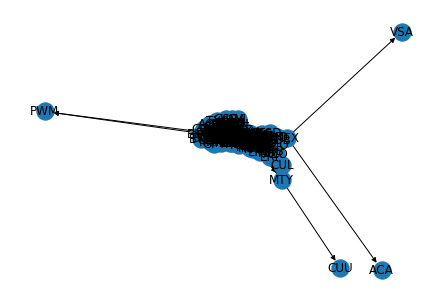

In [72]:
flightgraph_wt = nx.DiGraph()

# flight_graph.add_nodes_from(adjmatrix["source"].values)
# flight_graph.add_nodes_from(adjmatrix["dest"].values)

# flight_graph.nodes()
uniquecity =set()
weightage=+1
for ind in city_flights.index:
    flightgraph_wt.add_edge(city_flights['source'][ind],city_flights['dest'][ind],weight=city_flights["time_travel"][ind])
    uniquecity.add(city_flights['source'][ind])
    uniquecity.add(city_flights['dest'][ind])
#     flight_graph.add_edge(str(row['source']),str(row['dest']))

flightgraph_wt.nodes()
BLUE = "#99CCFF"
nx.draw(flightgraph_wt, with_labels=True)

How long does it take to travel to Honolulu, in flight times. 

In [73]:
print("Shortest path is ", nx.shortest_path(flightgraph_wt,"LEX","HNL",weight ='weight'))
print("Total number of hours = ", nx.dijkstra_path_length(flightgraph_wt,"LEX","HNL",weight ='weight'))

Shortest path is  ['LEX', 'ATL', 'HNL']
Total number of hours =  27
